# Description

File used: [korean house data](./Data/Korean_house_data/Daegu_Real_Estate_data.csv)

# Imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer, LabelEncoder, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, silhouette_score, davies_bouldin_score, v_measure_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, MeanShift, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from types import SimpleNamespace
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Load data

In [5]:
dataFilePath = './Data/Korean_house_data/Daegu_Real_Estate_data.csv'
originalDataset = pd.read_csv(dataFilePath)
originalDataset

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


# Dataset stats

In [5]:
originalDataset.shape

(5891, 30)

In [6]:
originalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [7]:
originalDataset.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [8]:
originalDataset.duplicated(keep='first').sum()

316

In [10]:
originalDataset[originalDataset.duplicated(keep='first')]

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
68,348672,2007,2007,11,1483,3,terraced,individual_heating,management_in_trust,7.0,...,1.0,0.0,1.0,2.0,1.0,1.0,1.0,5,9.0,5.0
76,360176,2007,2007,11,1483,4,terraced,individual_heating,management_in_trust,7.0,...,1.0,0.0,1.0,2.0,1.0,1.0,1.0,5,9.0,5.0
176,176106,2006,2008,2,903,1,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
280,291238,2007,2008,5,1394,11,terraced,individual_heating,management_in_trust,554.0,...,2.0,0.0,1.0,2.0,2.0,2.0,2.0,4,9.0,8.0
427,286902,2007,2008,10,1394,9,terraced,individual_heating,management_in_trust,554.0,...,2.0,0.0,1.0,2.0,2.0,2.0,2.0,4,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,144752,2013,2016,1,644,6,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0
4773,149274,2013,2016,1,644,16,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0
4774,143238,2013,2016,1,644,2,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0
4775,149274,2013,2016,1,644,17,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0


C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


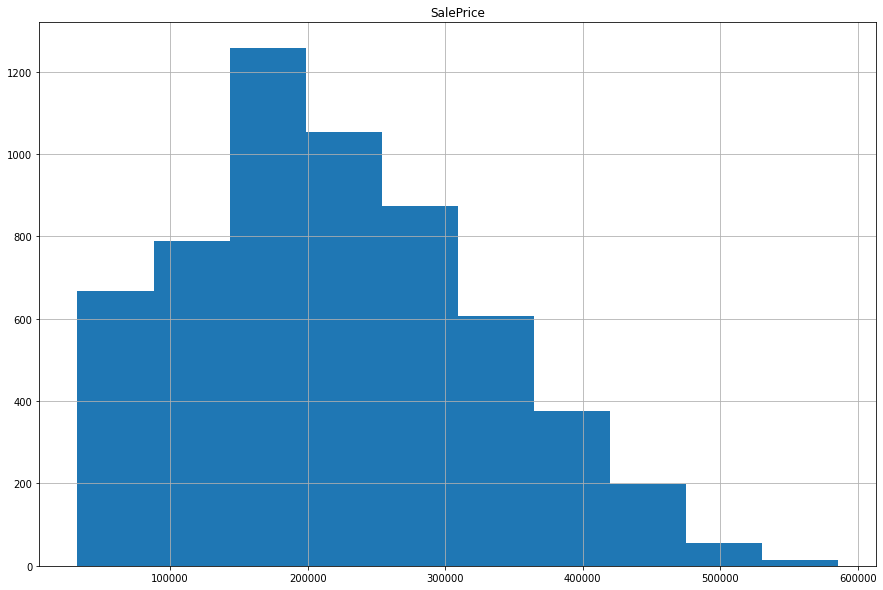

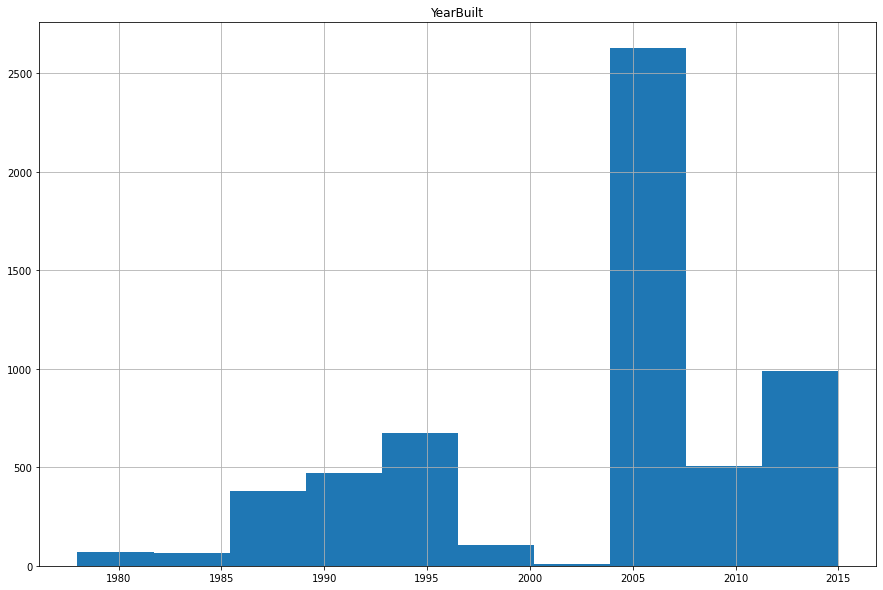

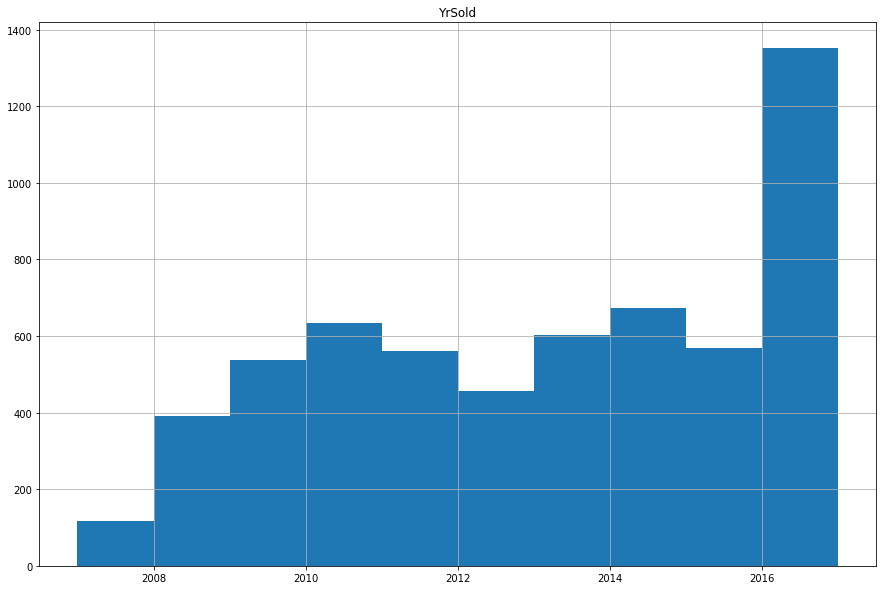

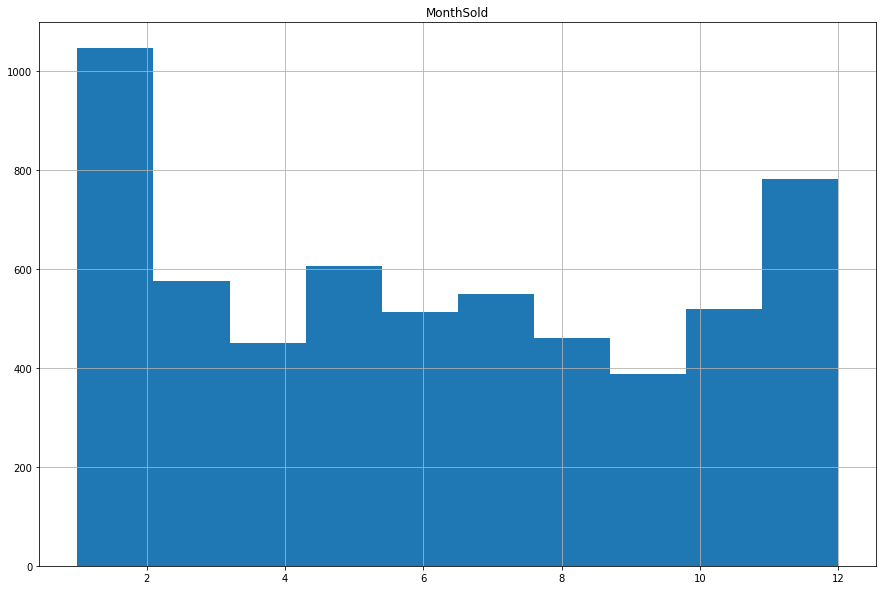

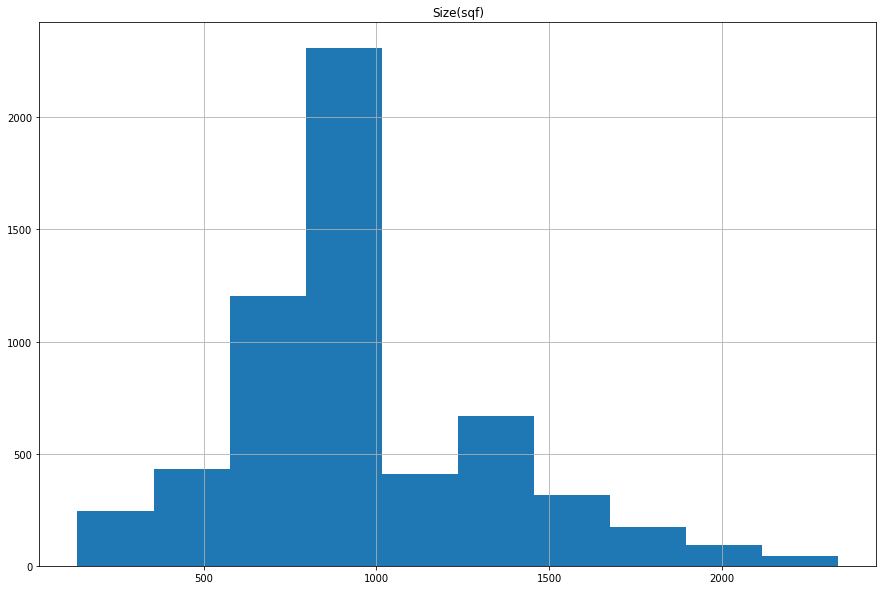

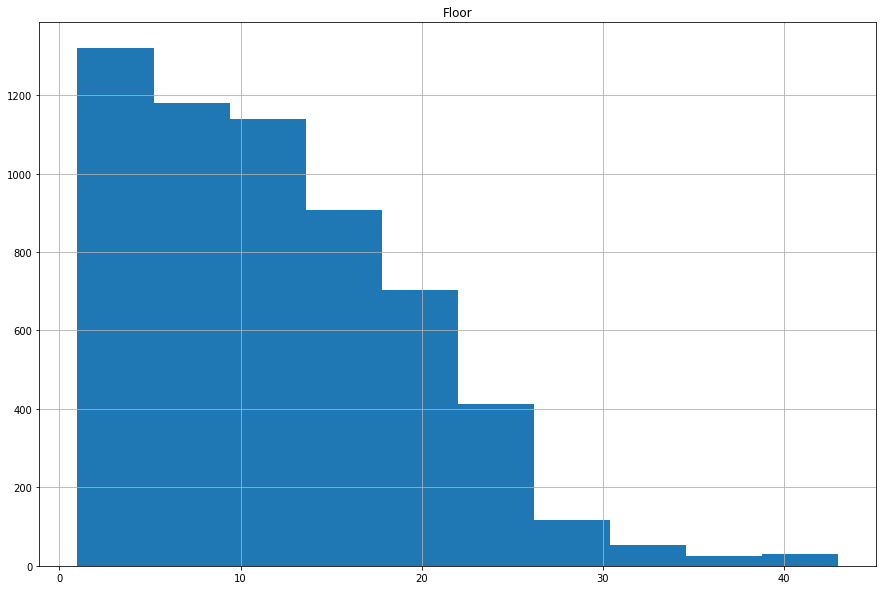

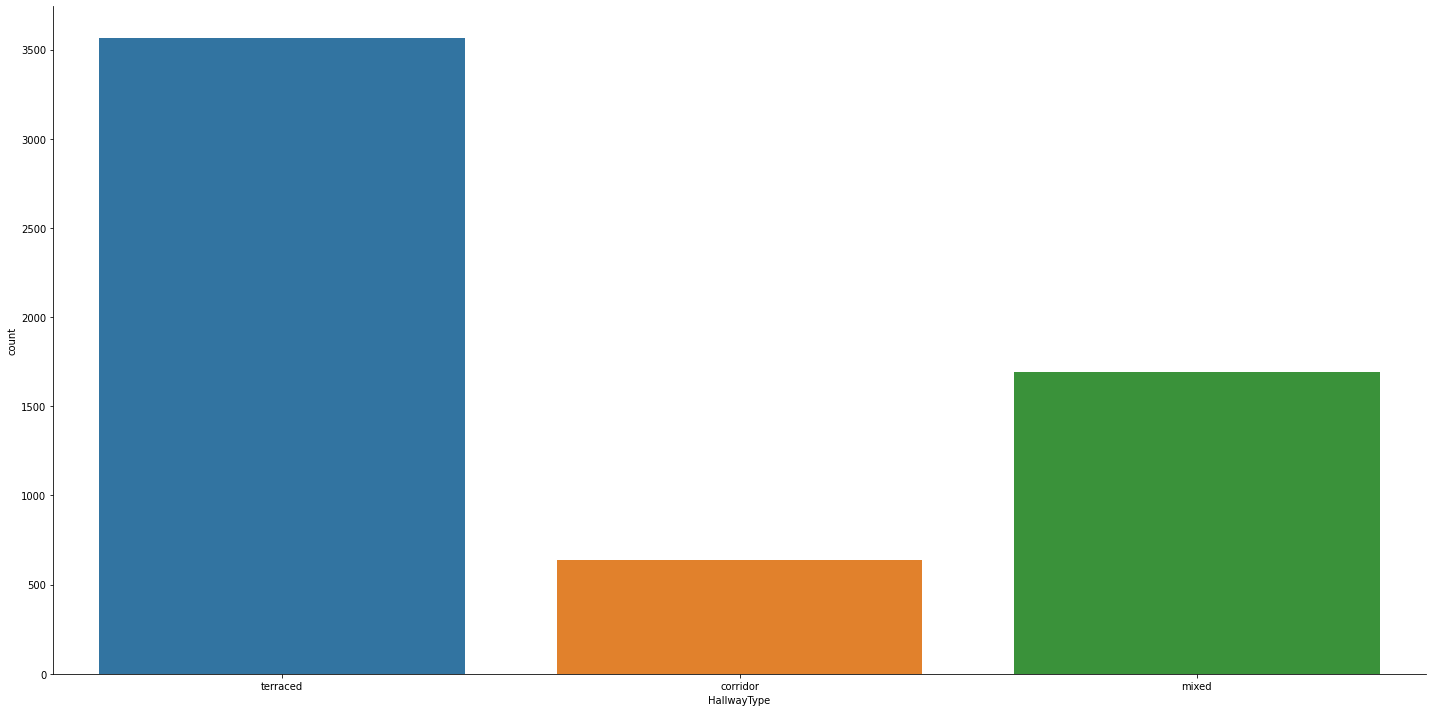

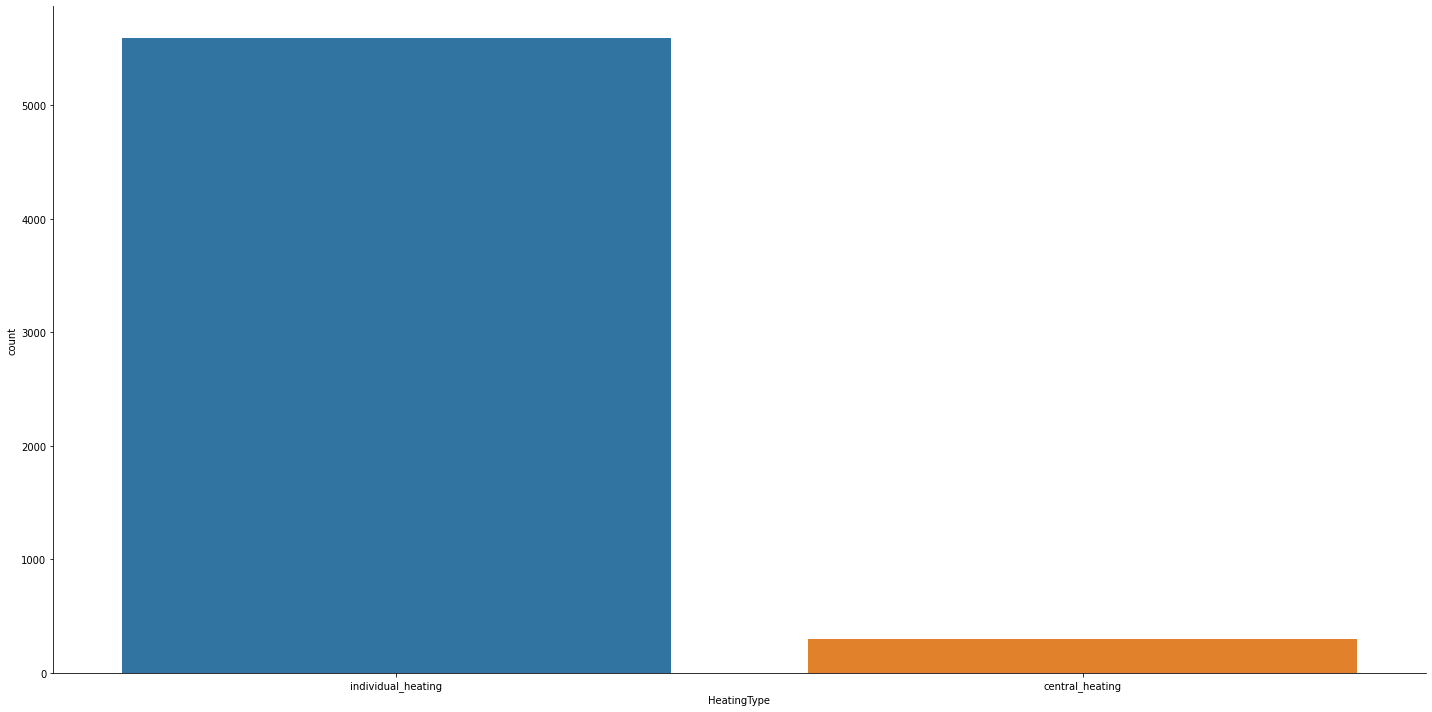

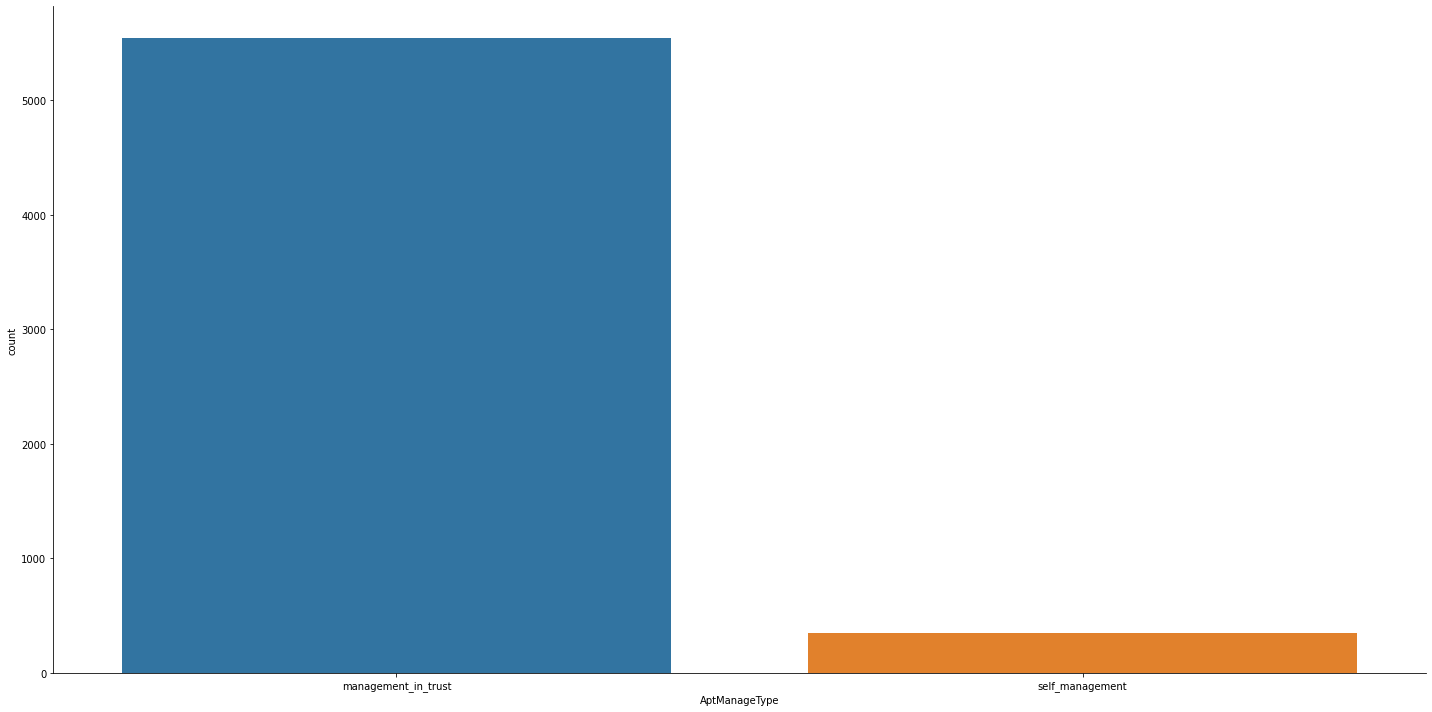

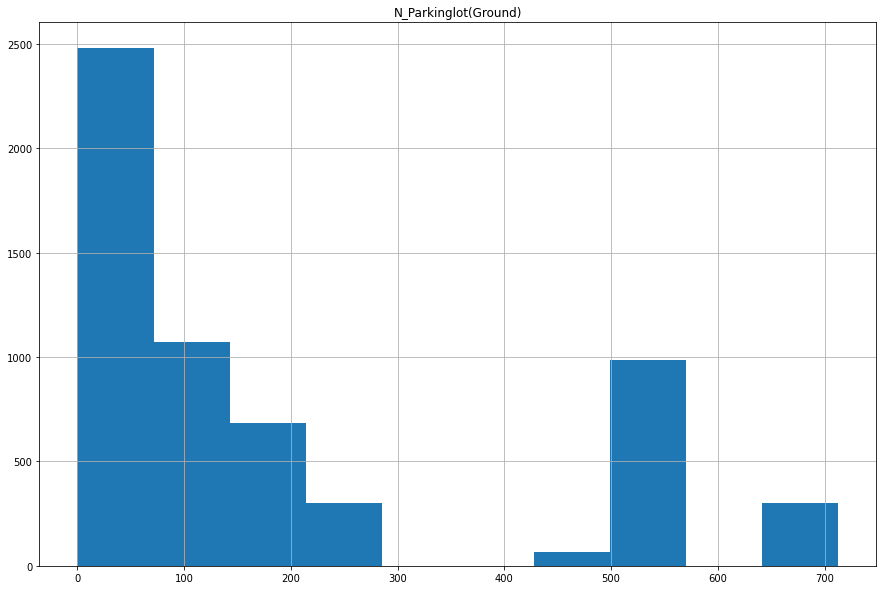

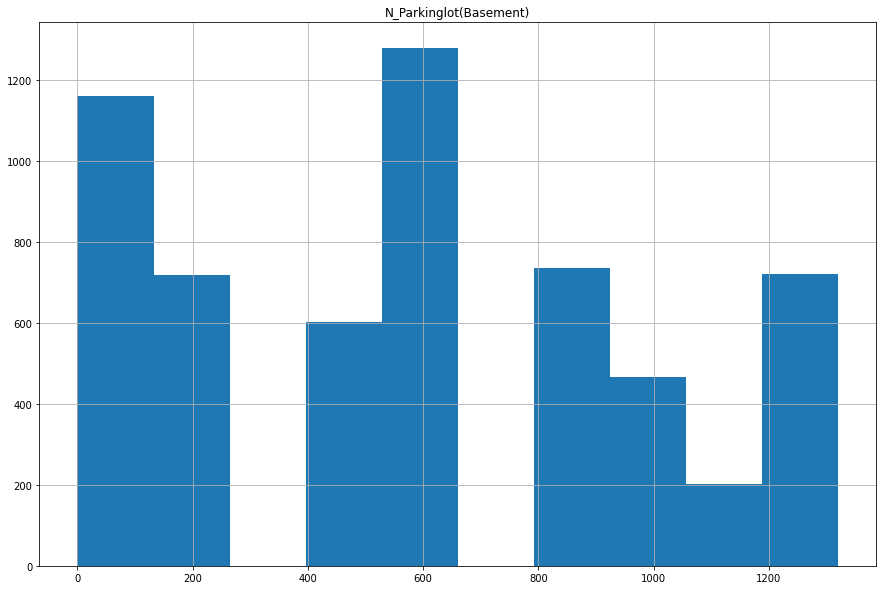

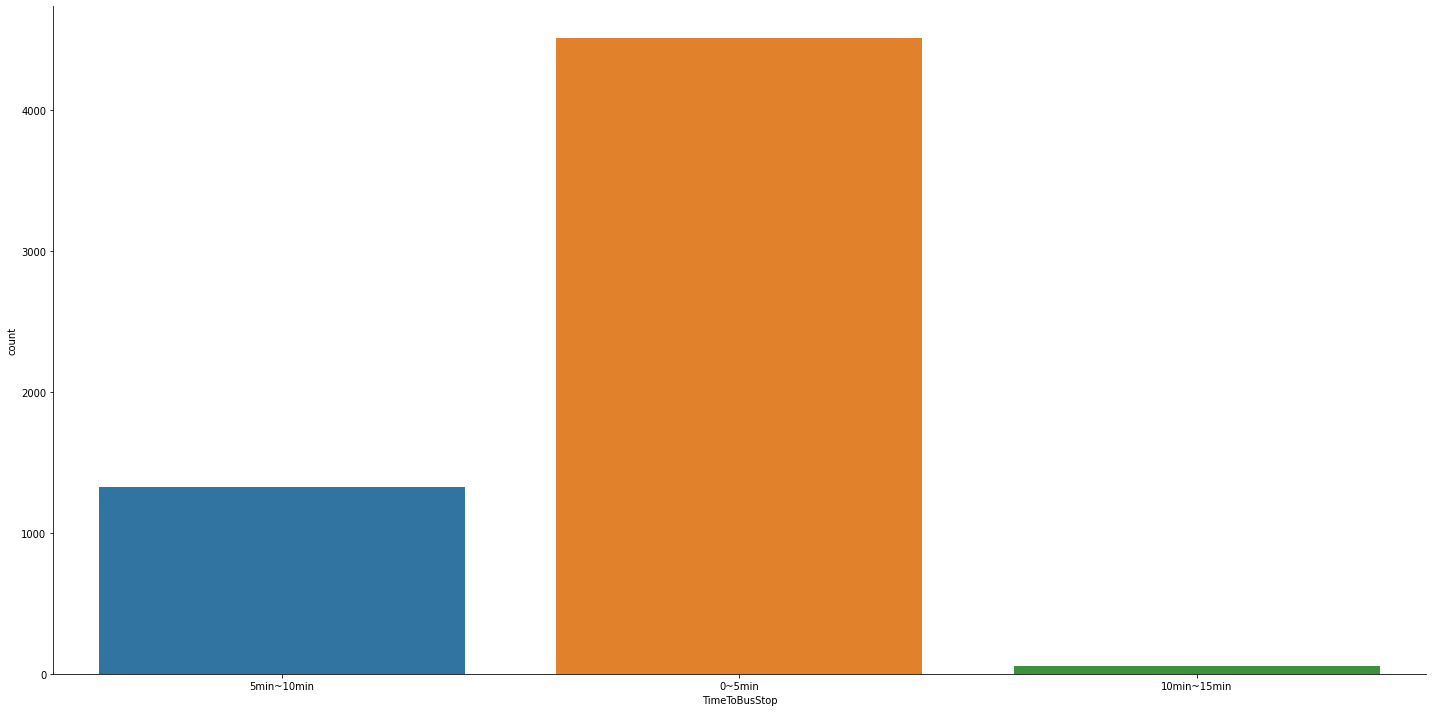

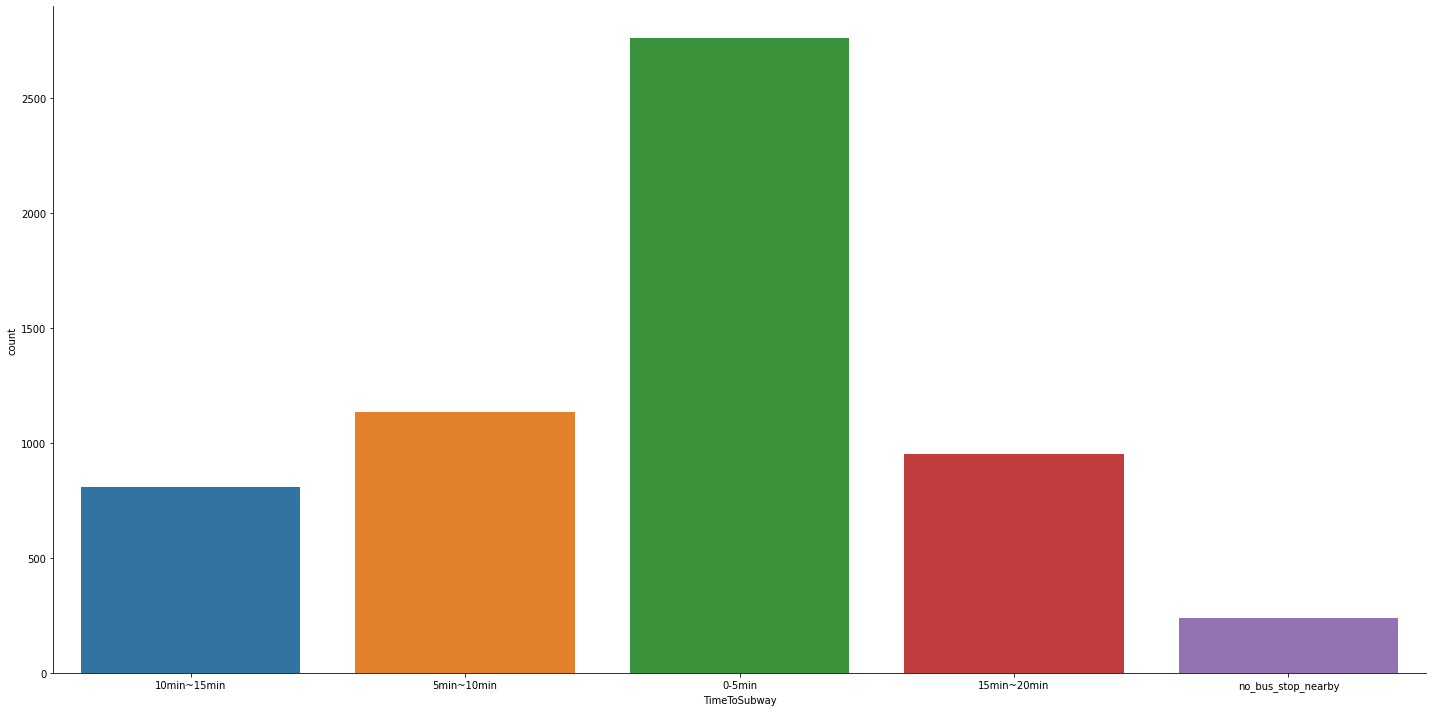

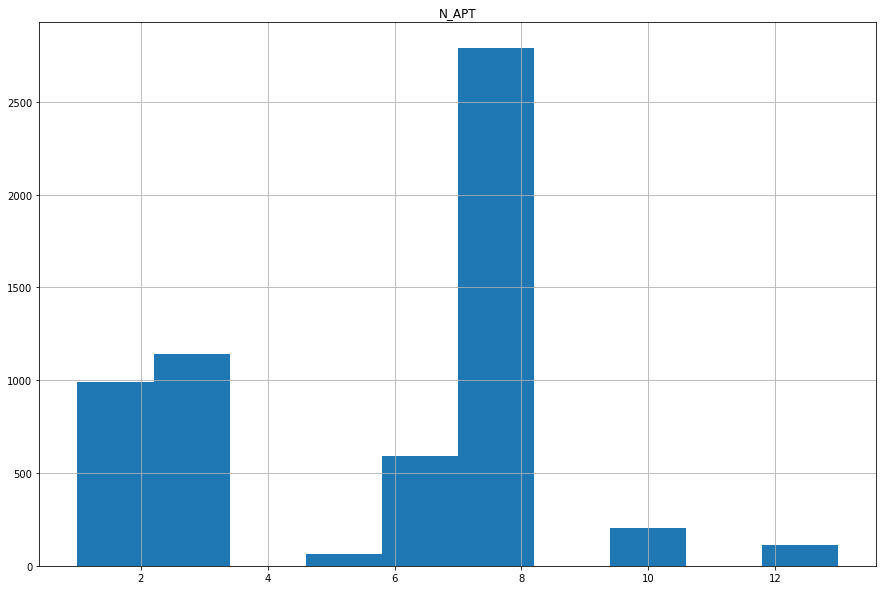

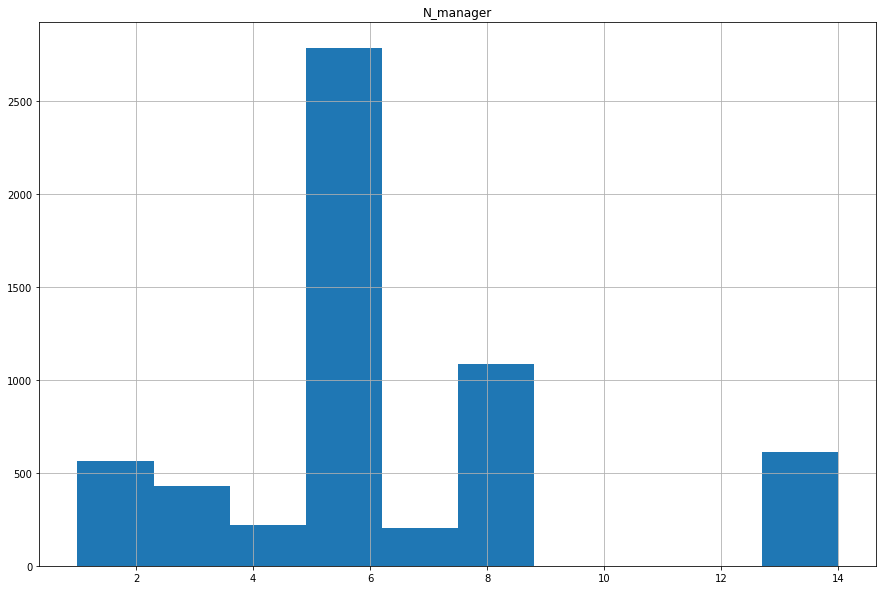

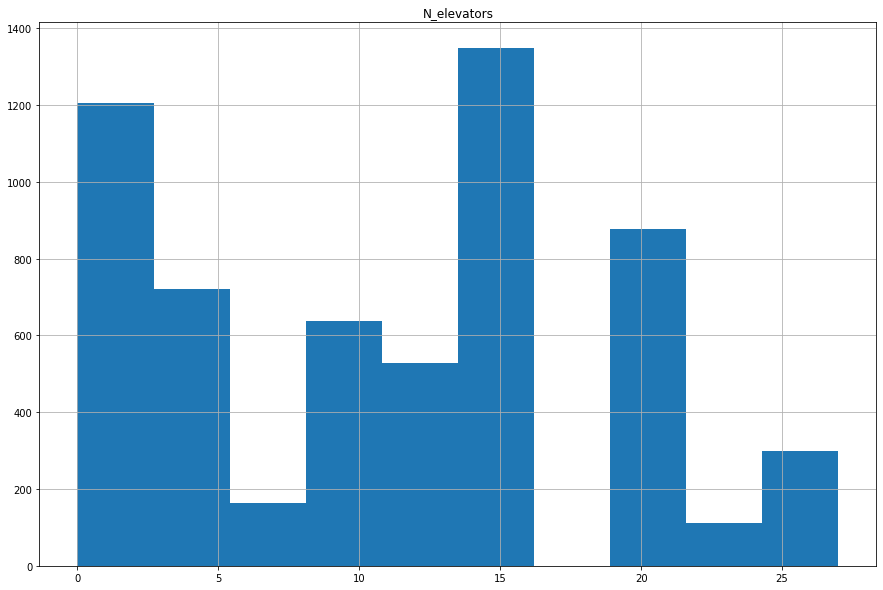

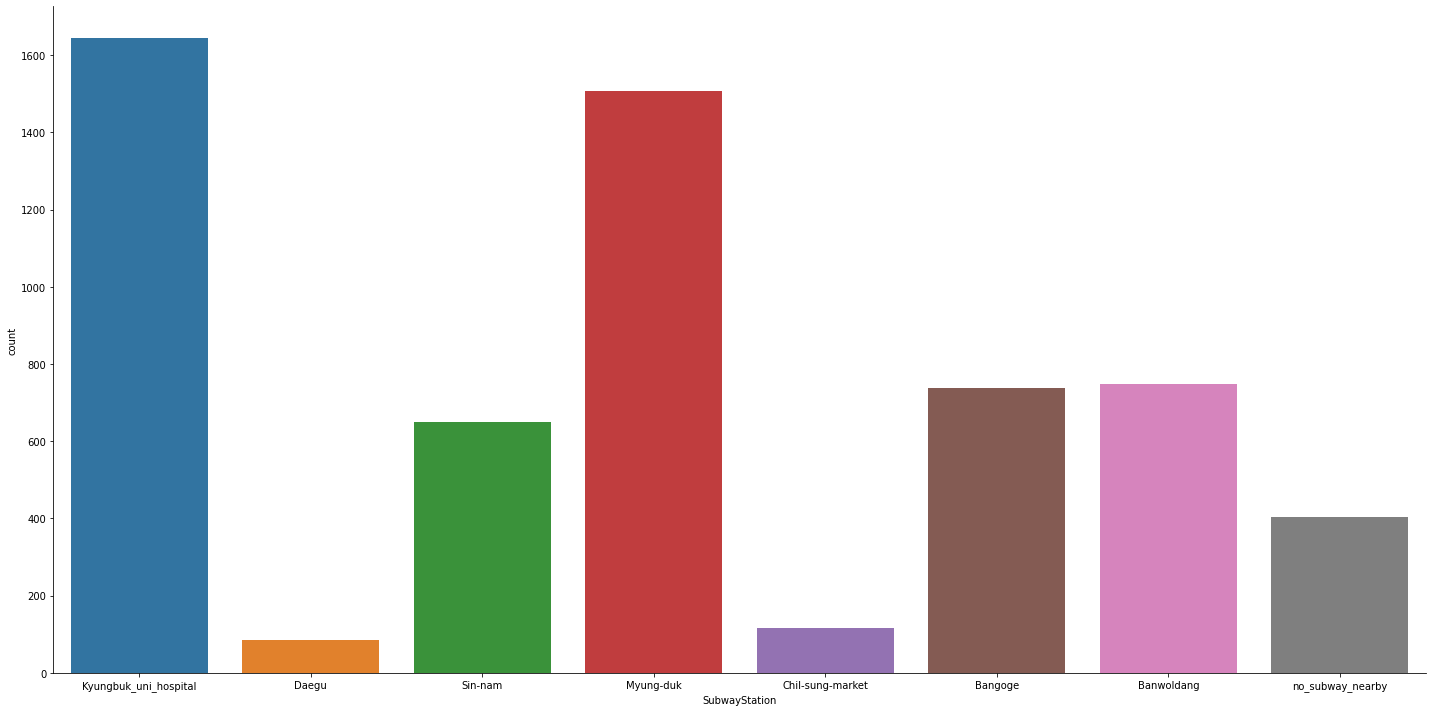

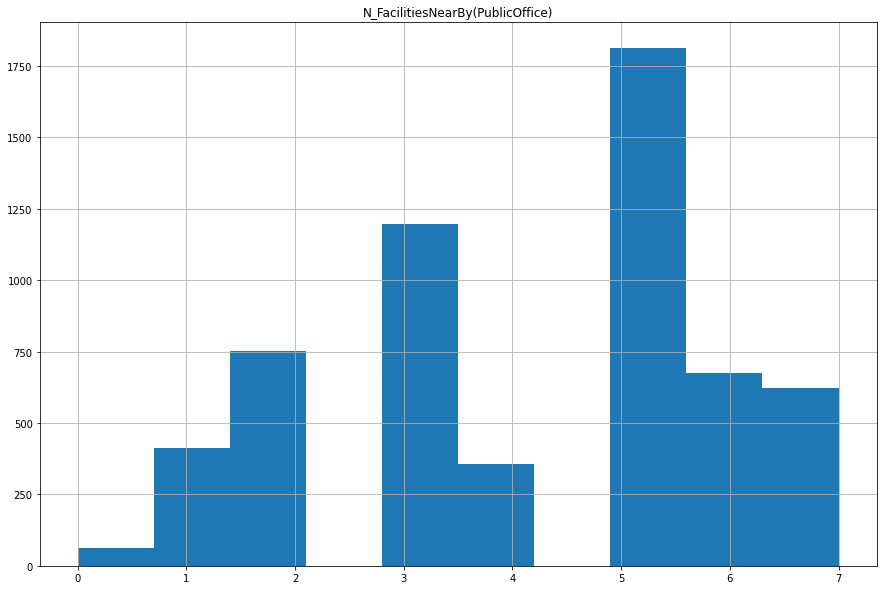

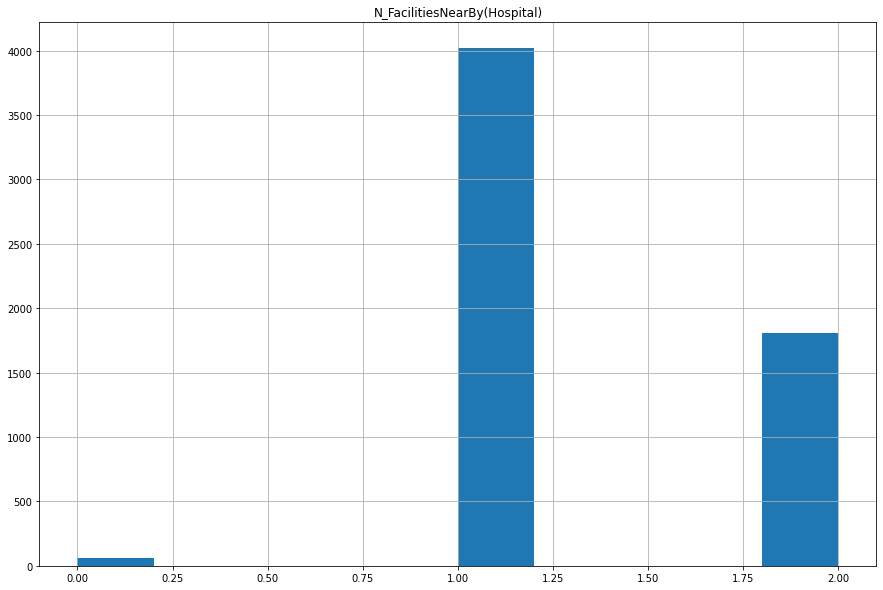

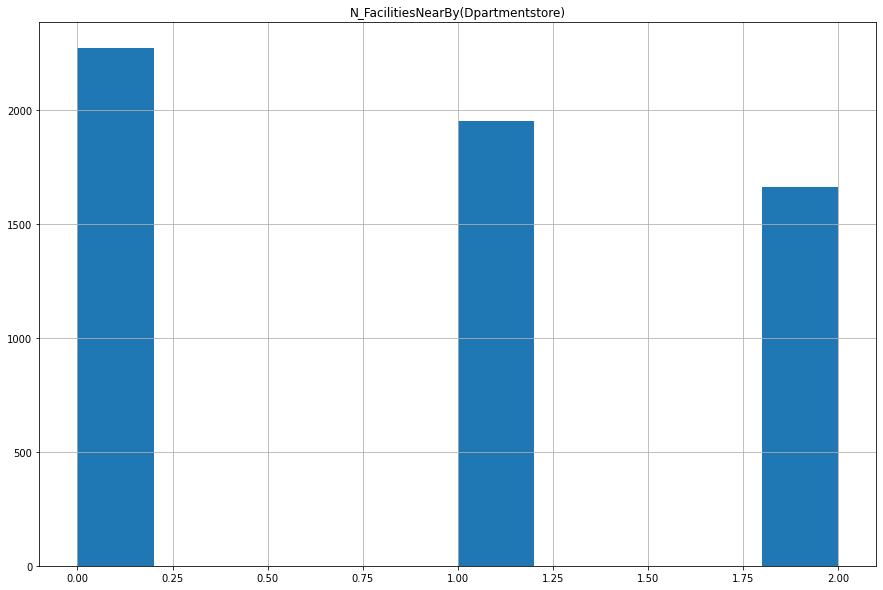

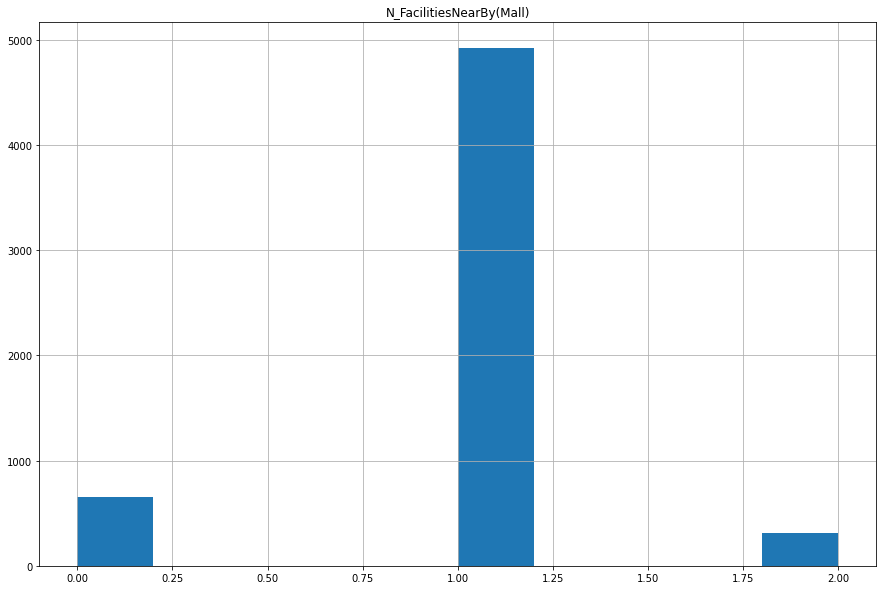

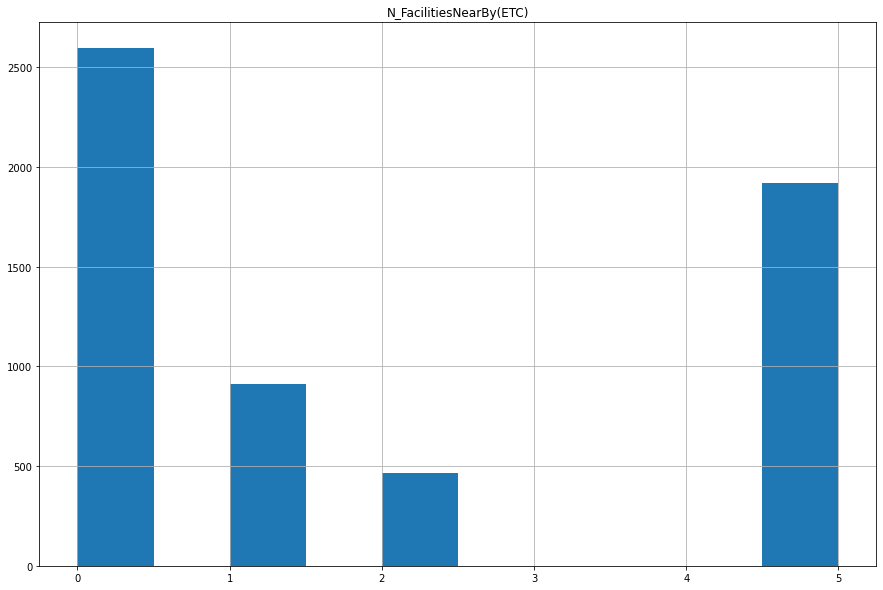

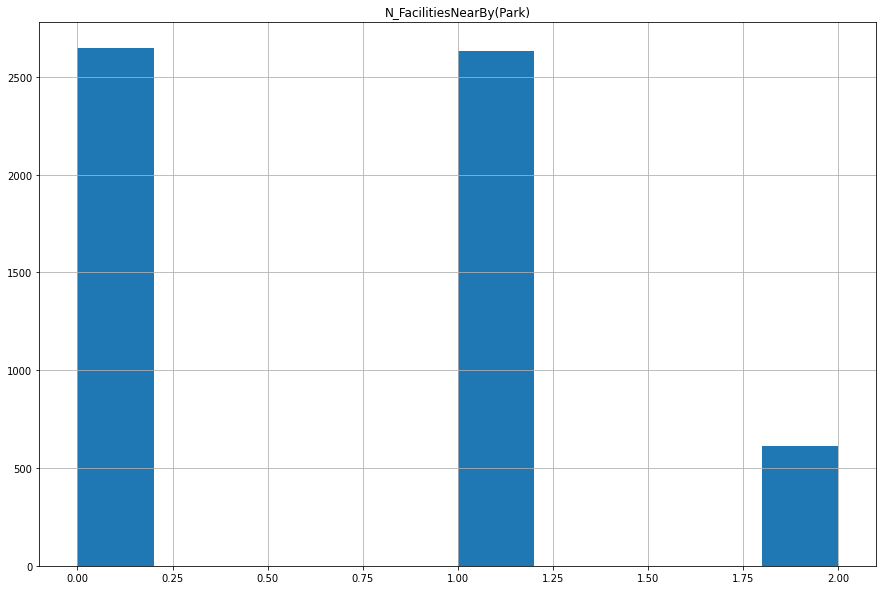

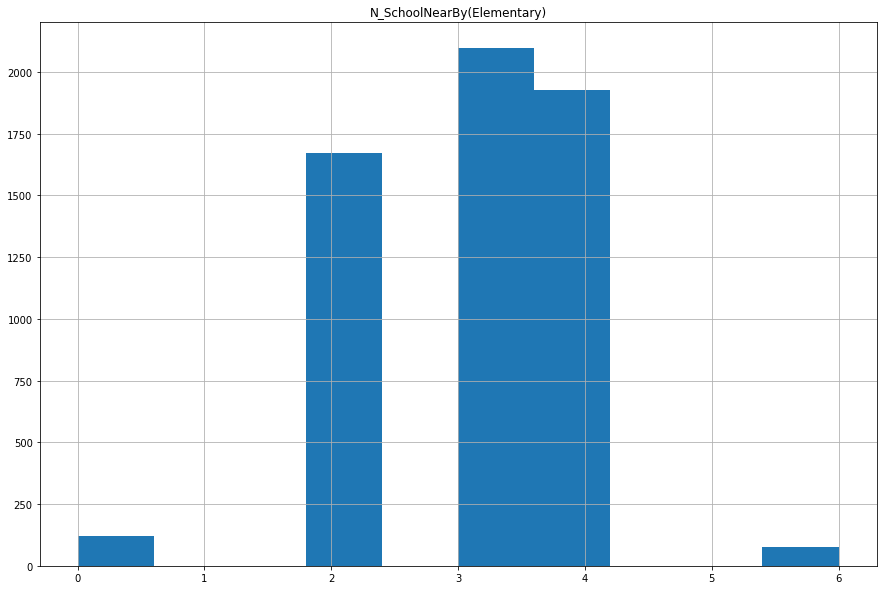

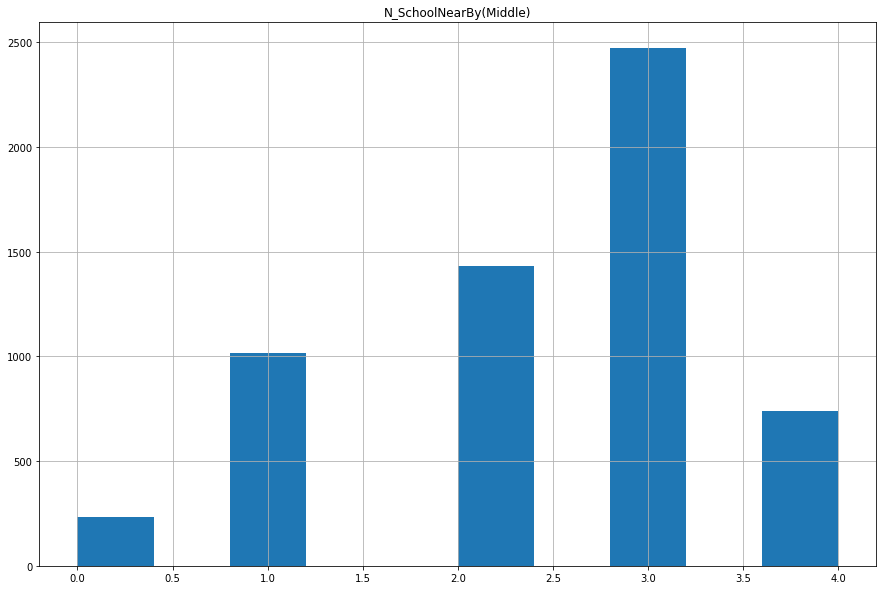

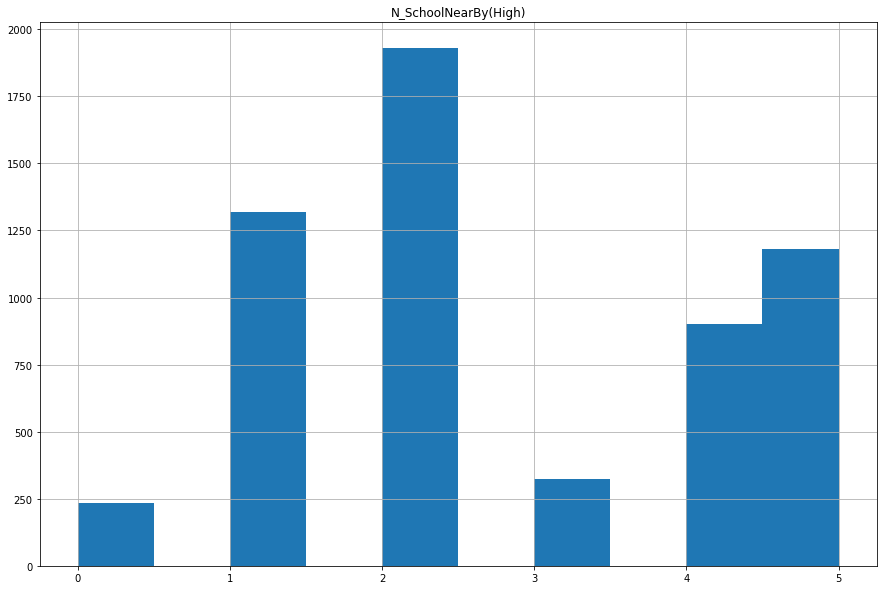

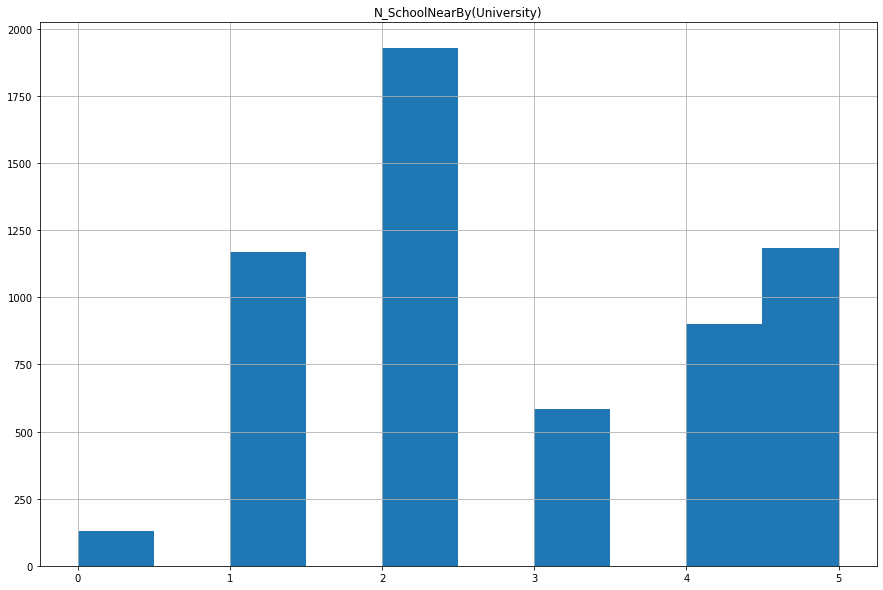

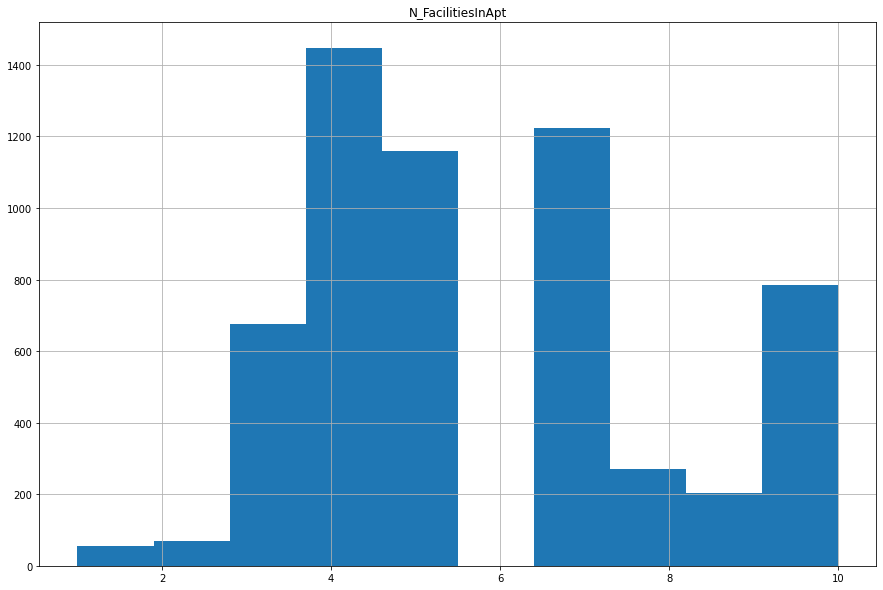

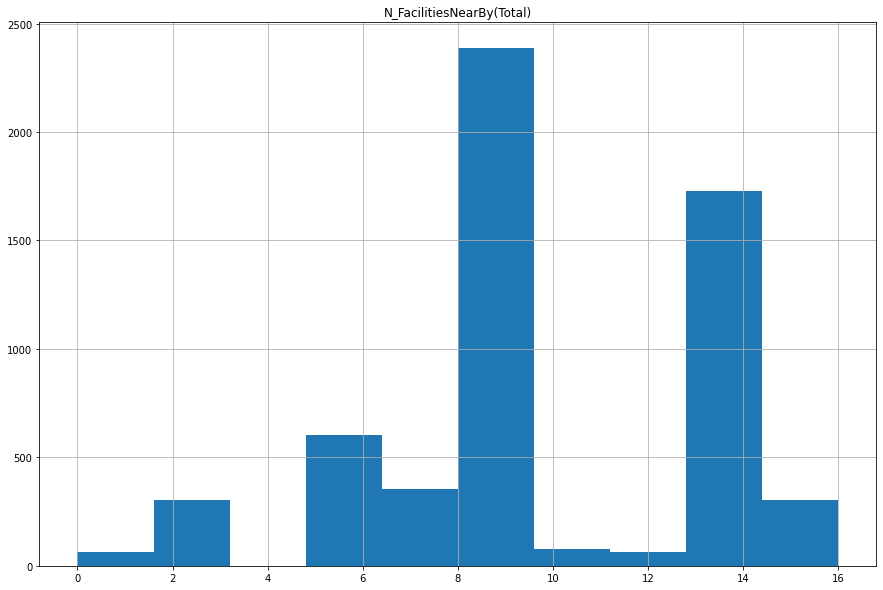

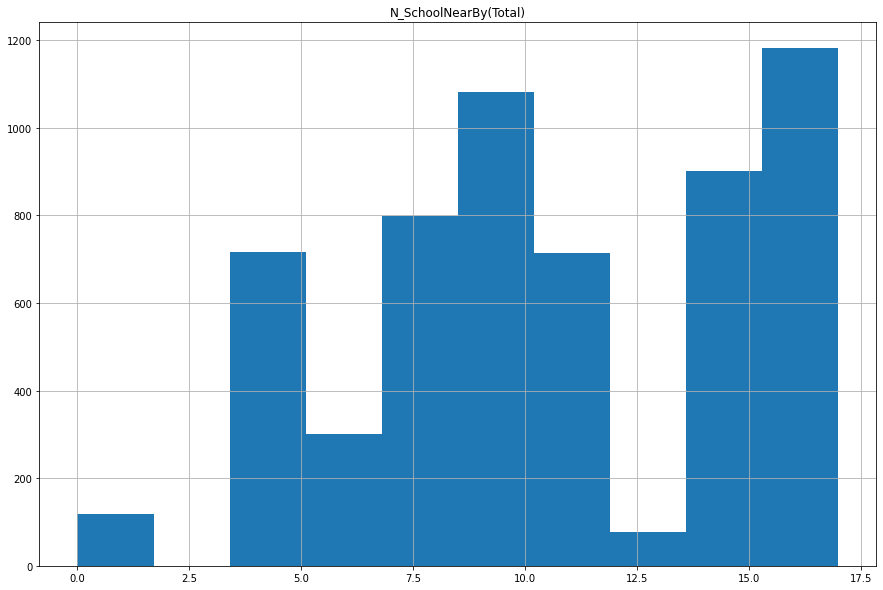

In [12]:
orgWithoutDupsFeatures = originalDataset.loc[:, originalDataset.columns]
categoricFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes == object].index)
numericFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes != object].index)
for column in originalDataset.columns:
    if (originalDataset.dtypes[column].name.__eq__('object')):
        sb.catplot(x=column, kind='count', data=originalDataset, height=10, aspect=2)
    else:
        originalDataset.hist(column=column, figsize=[15,10])

In [6]:
dupsOut = originalDataset.drop_duplicates()
dupsOut.shape

(5575, 30)

<AxesSubplot:>

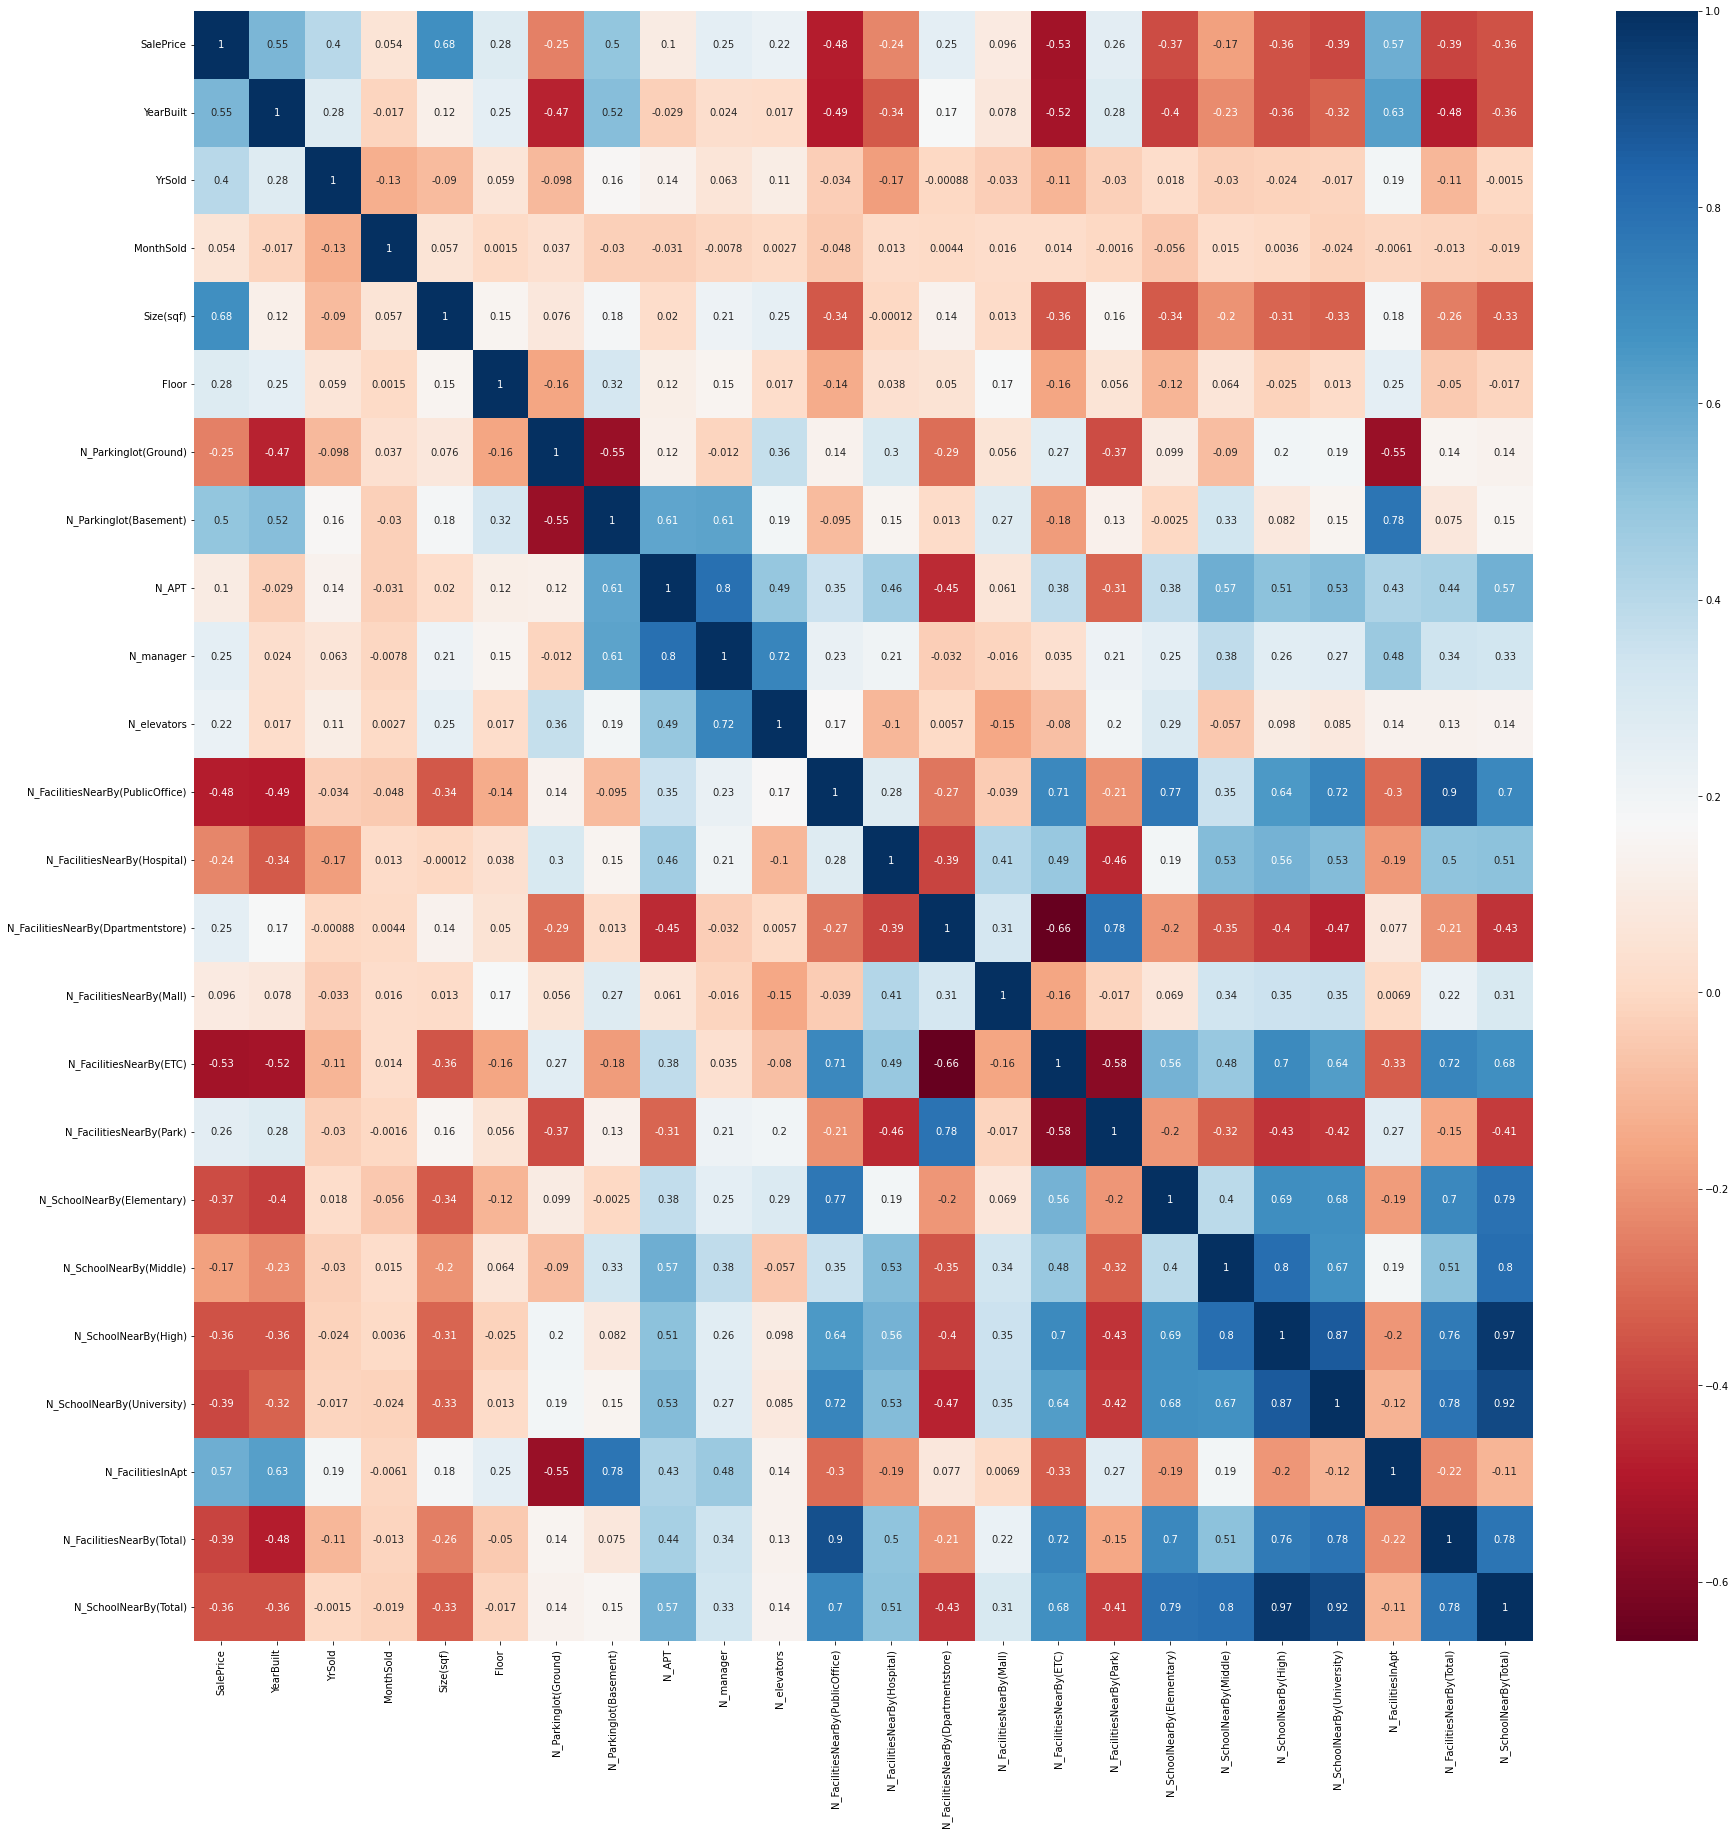

In [14]:
fig, ax = plt.subplots(figsize = (30,30))
sb.heatmap(dupsOut.corr(method='spearman'), annot=True, cmap='RdBu', ax=ax)

## Convert columns

In [7]:
convertedDataset = dupsOut.copy(deep=True)

labelEnc = LabelEncoder()
convertedDataset['TimeToSubway'] = labelEnc.fit_transform(convertedDataset['TimeToSubway'])
convertedDataset['TimeToBusStop'] = labelEnc.fit_transform(convertedDataset['TimeToBusStop'])

convertedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5575 non-null   int64  
 1   YearBuilt                           5575 non-null   int64  
 2   YrSold                              5575 non-null   int64  
 3   MonthSold                           5575 non-null   int64  
 4   Size(sqf)                           5575 non-null   int64  
 5   Floor                               5575 non-null   int64  
 6   HallwayType                         5575 non-null   object 
 7   HeatingType                         5575 non-null   object 
 8   AptManageType                       5575 non-null   object 
 9   N_Parkinglot(Ground)                5575 non-null   float64
 10  N_Parkinglot(Basement)              5575 non-null   float64
 11  TimeToBusStop                       5575 no

In [9]:
labBin = LabelBinarizer()

convertedCatList = list(convertedDataset.dtypes[convertedDataset.dtypes == object].index)
baseCt = ColumnTransformer([
    ('catBin', OneHotEncoder(), convertedCatList)
    ], remainder='passthrough')
convertedDataset_array = baseCt.fit_transform(convertedDataset)

In [7]:
print(convertedCatList)
print(len(convertedDataset_array))
print(len(convertedDataset_array[0]))

['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation']
5575
41


In [10]:
new_col_names = []
for i in range(len(baseCt.transformers)):
    new_col_names += [baseCt.transformers[i][0] + '_' + s for s in baseCt.transformers[i][2]]

new_col_names

['catBin_HallwayType',
 'catBin_HeatingType',
 'catBin_AptManageType',
 'catBin_SubwayStation']

In [11]:
print(convertedDataset_array[0])
checkData = pd.DataFrame(convertedDataset_array)
with pd.option_context('display.max_columns', 41):
    print(checkData.describe(include='all'))

[0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 1.41592e+05 2.00600e+03 2.00700e+03
 8.00000e+00 8.14000e+02 3.00000e+00 1.11000e+02 1.84000e+02 2.00000e+00
 1.00000e+00 3.00000e+00 3.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 3.00000e+00 2.00000e+00
 2.00000e+00 2.00000e+00 5.00000e+00 6.00000e+00 9.00000e+00]
                0            1            2            3            4   \
count  5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean      0.113901     0.284843     0.601256     0.053453     0.946547   
std       0.317720     0.451380     0.489684     0.224955     0.224955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     1.000000     0.00000

In [12]:
convertedNumlist = list(convertedDataset.dtypes[convertedDataset.dtypes != object].index)
stdCT = ColumnTransformer([
    ('catBin', OneHotEncoder(), convertedCatList),
    ('std', StandardScaler(), convertedNumlist)
    ], remainder='passthrough')
normCT = ColumnTransformer([
    ('catBin', OneHotEncoder(), convertedCatList),
    ('norm', MinMaxScaler(feature_range=(0,1)), convertedNumlist)
    ], remainder='passthrough')

stdDataset_array = stdCT.fit_transform(convertedDataset)
normDataset_array = normCT.fit_transform(convertedDataset)



In [13]:
checkStd = pd.DataFrame(stdDataset_array)
with pd.option_context('display.max_columns', 41):
    print(checkStd.describe(include='all'))

                0            1            2            3            4   \
count  5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean      0.113901     0.284843     0.601256     0.053453     0.946547   
std       0.317720     0.451380     0.489684     0.224955     0.224955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     1.000000     0.000000     1.000000   
75%       0.000000     1.000000     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean      0.937399     0.062601     0.114081     0.130404     0.020628   
std       0.242265     0.242265     0.317938     0.336777     0.142148   
min       0.000000     0.000000     0

In [14]:
checkNorm = pd.DataFrame(normDataset_array)
with pd.option_context('display.max_columns', 41):
    print(checkNorm.describe(include='all'))

                0            1            2            3            4   \
count  5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean      0.113901     0.284843     0.601256     0.053453     0.946547   
std       0.317720     0.451380     0.489684     0.224955     0.224955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     1.000000     0.000000     1.000000   
75%       0.000000     1.000000     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   \
count  5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean      0.937399     0.062601     0.114081     0.130404     0.020628   
std       0.242265     0.242265     0.317938     0.336777     0.142148   
min       0.000000     0.000000     0

# Predictive modeling

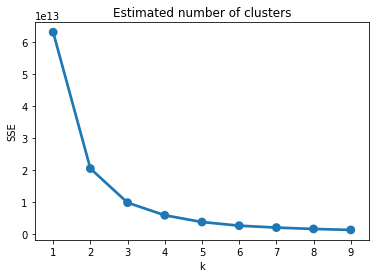

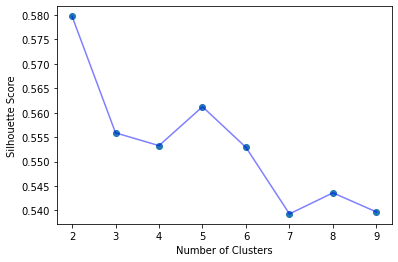

In [15]:
# KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(convertedDataset_array)
    sse[k] = kmeans.inertia_ 
   
plt.title('Estimated number of clusters')
plt.xlabel('k')
plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

silhouetteList = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    predict=kmeans.fit_predict(convertedDataset_array)
    score = silhouette_score(X = convertedDataset_array, labels = predict)
    silhouetteList.append(score)

plt.plot(np.arange(2 , 10) , silhouetteList , 'o')
plt.plot(np.arange(2 , 10) , silhouetteList , '-' , alpha = 0.5, color = 'blue')
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

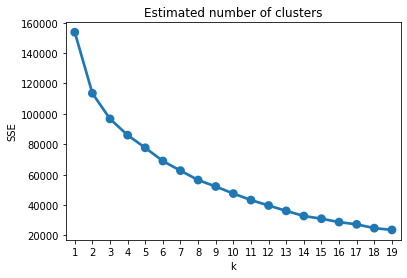

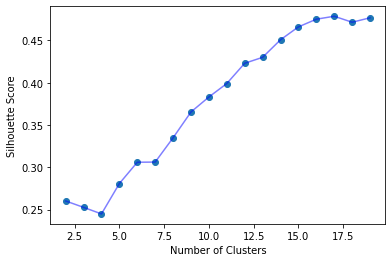

In [ ]:
# KMeans on standardized data
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stdDataset_array)
    sse[k] = kmeans.inertia_ 
   
plt.title('Estimated number of clusters')
plt.xlabel('k')
plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

silhouetteList = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    predict=kmeans.fit_predict(stdDataset_array)
    score = silhouette_score(X = stdDataset_array, labels = predict)
    silhouetteList.append(score)

plt.plot(np.arange(2 , 20) , silhouetteList , 'o')
plt.plot(np.arange(2 , 20) , silhouetteList , '-' , alpha = 0.5, color = 'blue')
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

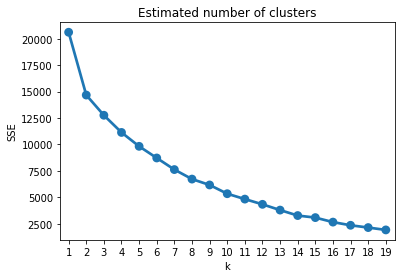

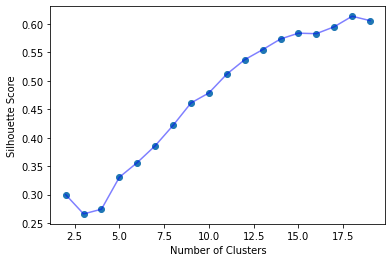

In [ ]:
# KMeans on normalized data
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normDataset_array)
    sse[k] = kmeans.inertia_ 
   
plt.title('Estimated number of clusters')
plt.xlabel('k')
plt.ylabel('SSE')
sb.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

silhouetteList = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    predict=kmeans.fit_predict(normDataset_array)
    score = silhouette_score(normDataset_array, predict)
    silhouetteList.append(score)

plt.plot(np.arange(2 , 20) , silhouetteList , 'o')
plt.plot(np.arange(2 , 20) , silhouetteList , '-' , alpha = 0.5, color = 'blue')
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

# Models

Using original dataset with 2 clusters

In [16]:
def model_scorings(data, model, name):
    print('Score for ' + name + ' model' + '\n')
    print('Silhouette score:', silhouette_score(data, model.labels_), '\n')
    print('Davies Bouldin score:', davies_bouldin_score(data, model.labels_), '\n')
    print('Calinski Harabasz score:', calinski_harabasz_score(data, model.labels_), '\n')

In [17]:
def model_pca1d_visualize(model, clusters, data):
    helpData = pd.DataFrame(data)
    helpData['Cluster'] = clusters

    pca_1d = PCA(n_components=1)
    PCs_1d = pd.DataFrame(pca_1d.fit_transform(data))
    PCs_1d.columns = ["PC1_1d"]
    helpData = pd.concat([helpData,PCs_1d], axis=1, join='inner')
    helpData["dummy"] = 0
    cluster1 = helpData[helpData["Cluster"] == 0]
    cluster2 = helpData[helpData["Cluster"] == 1]

    trace1 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    trace2 = go.Scatter(
                        x = cluster2["PC1_1d"],
                        y = cluster2["dummy"],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    plotdata = [trace1, trace2]

    title = "1D PCA"

    layout = dict(title = title,
                xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
                yaxis= dict(title= '',ticklen= 5,zeroline= False)
                )

    fig = dict(data = plotdata, layout = layout)

    iplot(fig)

In [22]:
def model_pca2d_visualize(model, clusters, data):
    helpData = pd.DataFrame(data)
    helpData['Cluster'] = clusters

    pca_2d = PCA(n_components=2)
    PCs_2d = pd.DataFrame(pca_2d.fit_transform(data))
    PCs_2d.columns = ["PC1_2d", 'PC2_2d']
    helpData = pd.concat([helpData,PCs_2d], axis=1, join='inner')
    cluster1 = helpData[helpData["Cluster"] == 0]
    cluster2 = helpData[helpData["Cluster"] == 1]

    trace1 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    trace2 = go.Scatter(
                        x = cluster2["PC1_2d"],
                        y = cluster2["PC2_2d"],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    plotdata = [trace1, trace2]

    title = "2D PCA"

    layout = dict(title = title,
                xaxis= dict(title= 'PC2',ticklen= 5,zeroline= False),
                yaxis= dict(title= '',ticklen= 5,zeroline= False)
                )

    fig = dict(data = plotdata, layout = layout)

    iplot(fig)

In [28]:
def model_pca3d_visualize(model, clusters, data):
    helpData = pd.DataFrame(data)
    helpData['Cluster'] = clusters

    pca_3d = PCA(n_components=3)
    PCs_3d = pd.DataFrame(pca_3d.fit_transform(data))
    PCs_3d.columns = ["PC1_3d", 'PC2_3d', 'PC3_3d']
    helpData = pd.concat([helpData,PCs_3d], axis=1, join='inner')
    cluster1 = helpData[helpData["Cluster"] == 0]
    cluster2 = helpData[helpData["Cluster"] == 1]

    trace1 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1['PC3_3d'],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    trace2 = go.Scatter3d(
                        x = cluster2["PC1_3d"],
                        y = cluster2["PC2_3d"],
                        z = cluster2['PC3_3d'],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    plotdata = [trace1, trace2]

    title = "3D PCA"

    layout = dict(title = title,
                xaxis= dict(title= 'PC3',ticklen= 5,zeroline= False),
                yaxis= dict(title= '',ticklen= 5,zeroline= False)
                )

    fig = dict(data = plotdata, layout = layout)

    iplot(fig)

In [31]:
def model_tsne1d_visualize(model, clusters, data):
    helpData = pd.DataFrame(data)
    helpData['Cluster'] = clusters

    pca_1d = TSNE(n_components=1, )
    PCs_1d = pd.DataFrame(pca_1d.fit_transform(data))
    PCs_1d.columns = ["PC1_1d"]
    helpData = pd.concat([helpData,PCs_1d], axis=1, join='inner')
    helpData["dummy"] = 0
    cluster1 = helpData[helpData["Cluster"] == 0]
    cluster2 = helpData[helpData["Cluster"] == 1]

    trace1 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    trace2 = go.Scatter(
                        x = cluster2["PC1_1d"],
                        y = cluster2["dummy"],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    plotdata = [trace1, trace2]

    title = "1D TSNE"

    layout = dict(title = title,
                xaxis= dict(title= 'TSNE1',ticklen= 5,zeroline= False),
                yaxis= dict(title= '',ticklen= 5,zeroline= False)
                )

    fig = dict(data = plotdata, layout = layout)

    iplot(fig)

def model_tsne2d_visualize(model, clusters, data):
    helpData = pd.DataFrame(data)
    helpData['Cluster'] = clusters

    pca_2d = TSNE(n_components=2)
    PCs_2d = pd.DataFrame(pca_2d.fit_transform(data))
    PCs_2d.columns = ["PC1_2d", 'PC2_2d']
    helpData = pd.concat([helpData,PCs_2d], axis=1, join='inner')
    cluster1 = helpData[helpData["Cluster"] == 0]
    cluster2 = helpData[helpData["Cluster"] == 1]

    trace1 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    trace2 = go.Scatter(
                        x = cluster2["PC1_2d"],
                        y = cluster2["PC2_2d"],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    plotdata = [trace1, trace2]

    title = "2D TSNE"

    layout = dict(title = title,
                xaxis= dict(title= 'TSNE3',ticklen= 5,zeroline= False),
                yaxis= dict(title= '',ticklen= 5,zeroline= False)
                )

    fig = dict(data = plotdata, layout = layout)

    iplot(fig)

def model_tsne3d_visualize(model, clusters, data):
    helpData = pd.DataFrame(data)
    helpData['Cluster'] = clusters

    pca_3d = TSNE(n_components=3)
    PCs_3d = pd.DataFrame(pca_3d.fit_transform(data))
    PCs_3d.columns = ["PC1_3d", 'PC2_3d', 'PC3_3d']
    helpData = pd.concat([helpData,PCs_3d], axis=1, join='inner')
    cluster1 = helpData[helpData["Cluster"] == 0]
    cluster2 = helpData[helpData["Cluster"] == 1]

    trace1 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1['PC3_3d'],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

    trace2 = go.Scatter3d(
                        x = cluster2["PC1_3d"],
                        y = cluster2["PC2_3d"],
                        z = cluster2['PC3_3d'],
                        mode = "markers",
                        name = "Cluster 2",
                        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text = None)

    plotdata = [trace1, trace2]

    title = "3D TSNE"

    layout = dict(title = title,
                xaxis= dict(title= 'TSNE3',ticklen= 5,zeroline= False),
                yaxis= dict(title= '',ticklen= 5,zeroline= False)
                )

    fig = dict(data = plotdata, layout = layout)

    iplot(fig)

In [19]:
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(convertedDataset_array)
clusters_kmeans = model_kmeans.predict(convertedDataset_array)

model_scorings(convertedDataset_array, model_kmeans, 'KMeans')


Score for KMeans model

Silhouette score: 0.5797520604637911 

Davies Bouldin score: 0.5764856626222465 

Calinski Harabasz score: 11620.962126853034 



In [20]:
model_pca1d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)

In [29]:
model_pca2d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)
model_pca3d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)

In [32]:
model_tsne1d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)
model_tsne2d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)
model_tsne3d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)

C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
model_kmeans = DBSCAN(n_clusters=2)
model_kmeans.fit(convertedDataset_array)
clusters_kmeans = model_kmeans.predict(convertedDataset_array)

model_scorings(convertedDataset_array, model_kmeans, 'KMeans')
model_pca1d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)
model_pca2d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)
model_pca3d_visualize(model_kmeans, clusters_kmeans, convertedDataset_array)